# Trabalho Prático de Sensorização e Ambiente

### Imports

In [67]:
import datetime
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import time
import math
from sklearn.svm import SVC
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

RANDOM_SEED = 2021

## Visualização e Estudo dos Dados - 

### Informação dos dados

In [45]:
dataset = pd.read_csv('docs/data.csv', sep=",")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MAC Address         5322 non-null   object 
 1   Timestamp           5322 non-null   int64  
 2   S1 Signal Strength  5322 non-null   float64
 3   Distance to S1      5322 non-null   float64
 4   S2 Signal Strength  5322 non-null   float64
 5   Distance to S2      5322 non-null   float64
 6   Year                5322 non-null   int64  
 7   Month               5322 non-null   int64  
 8   Day                 5322 non-null   int64  
 9   Day of the Week     5322 non-null   object 
 10  Hour                5322 non-null   int64  
 11  Minute              5322 non-null   int64  
 12  X                   5322 non-null   float64
 13  Y                   5322 non-null   float64
 14  Device              5322 non-null   object 
 15  Area                5322 non-null   object 
dtypes: flo

Remover repetições de dispositivos na mesma hora e no mesmo dia

In [46]:
dataset.drop_duplicates(subset=['MAC Address', 'Hour', 'Day'], inplace=True)

### Visualização de Outliers

#### Feature S1 Signal Strength

<Axes: >

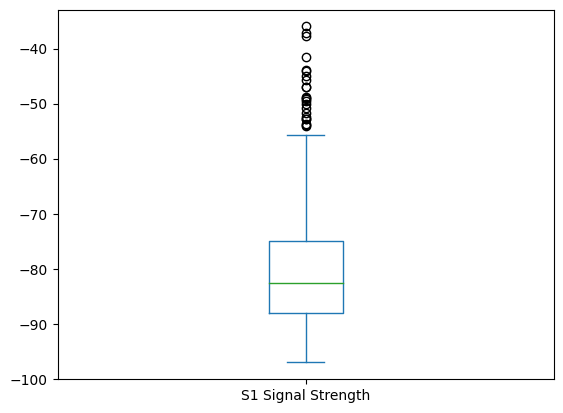

In [47]:
dataset["S1 Signal Strength"].plot.box()

#### Feature Distance to S1

<Axes: >

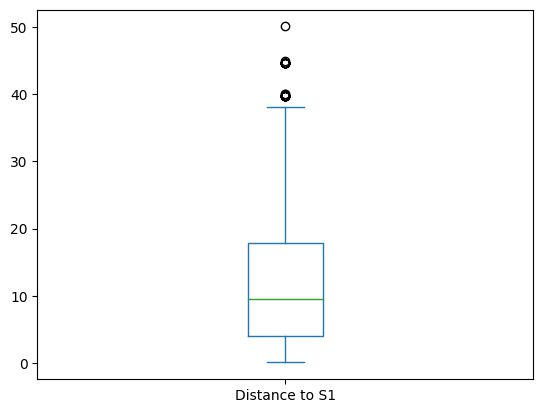

In [48]:
dataset["Distance to S1"].plot.box()

#### Feature S2 Signal Strength

<Axes: >

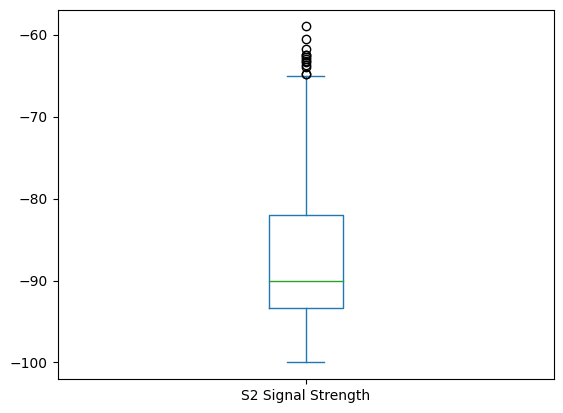

In [49]:
dataset["S2 Signal Strength"].plot.box()

#### Feature Distance to S2

<Axes: >

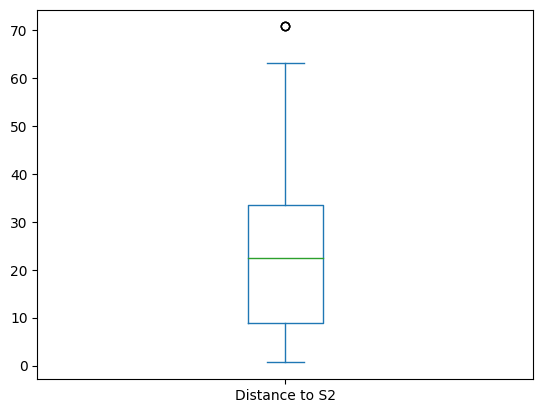

In [50]:
dataset["Distance to S2"].plot.box()

#### Feature X

<Axes: >

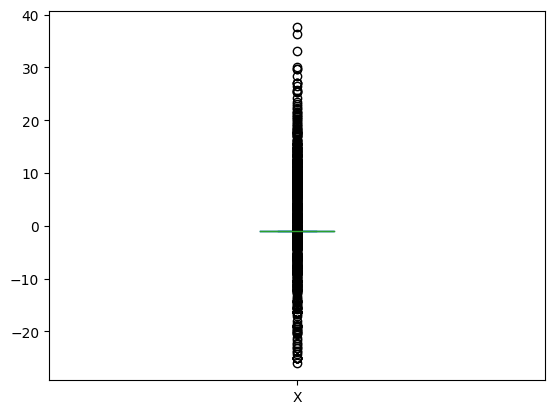

In [51]:
dataset["X"].plot.box()

#### Feature Y

<Axes: >

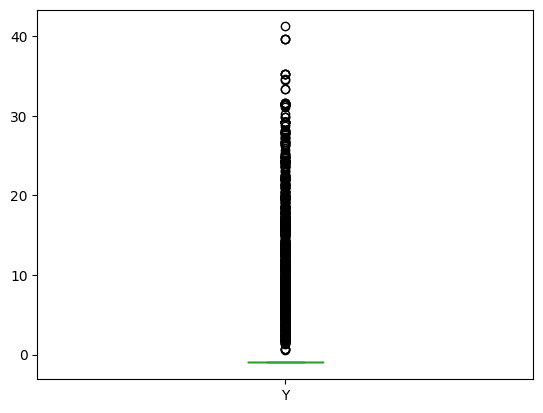

In [52]:
dataset["Y"].plot.box()

### Valores em falta

<Axes: >

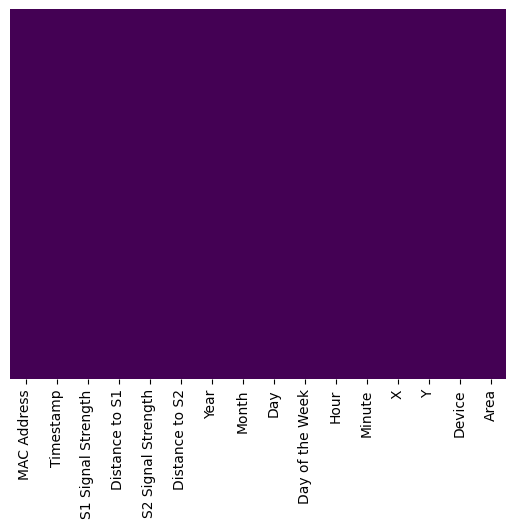

In [53]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Valores duplicados

In [54]:
dataset.duplicated()

0       False
1       False
2       False
3       False
19      False
        ...  
5317    False
5318    False
5319    False
5320    False
5321    False
Length: 3582, dtype: bool

### Features nominais

#### Feature Area

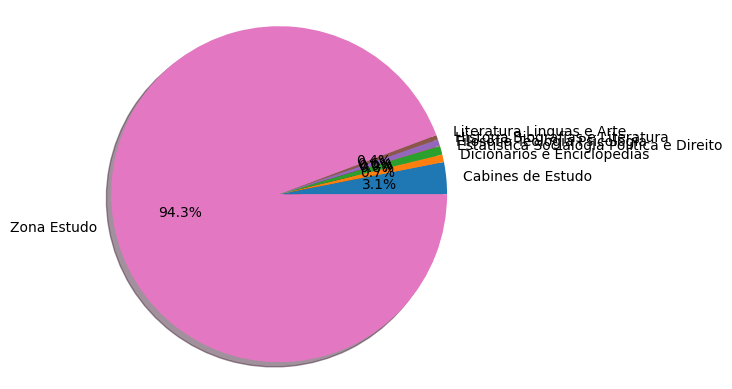

In [55]:
labels = dataset['Area'].astype('category').cat.categories.tolist()
counts = dataset['Area'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<Axes: xlabel='Area'>

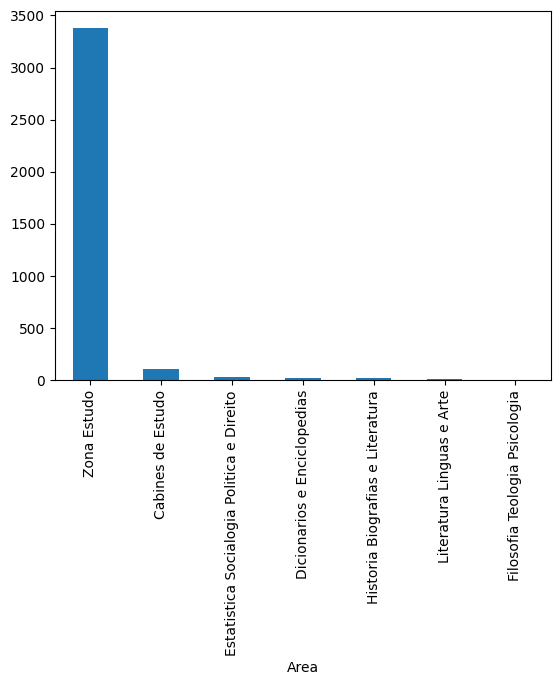

In [56]:
dataset['Area'].value_counts().plot(kind='bar')

#### Feature Device

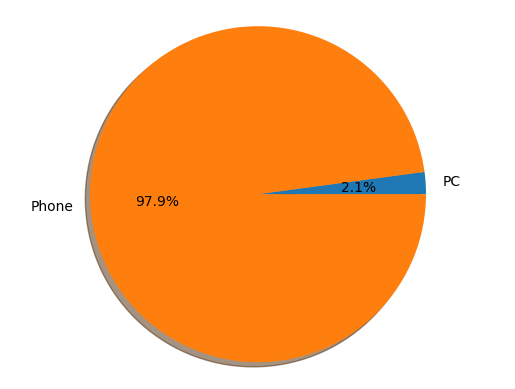

In [57]:
labels = dataset['Device'].astype('category').cat.categories.tolist()
counts = dataset['Device'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<Axes: xlabel='Device'>

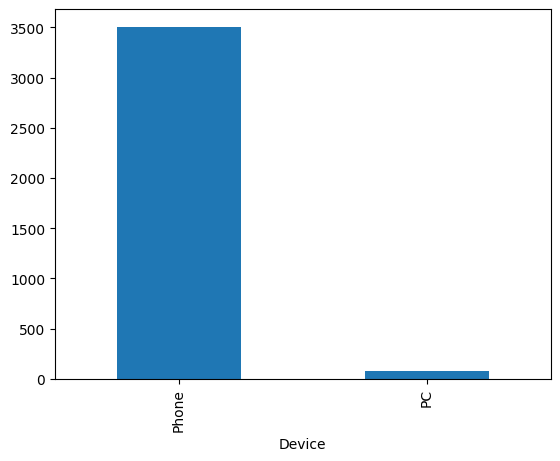

In [58]:
dataset['Device'].value_counts().plot(kind='bar')

#### Feature Day of the Week

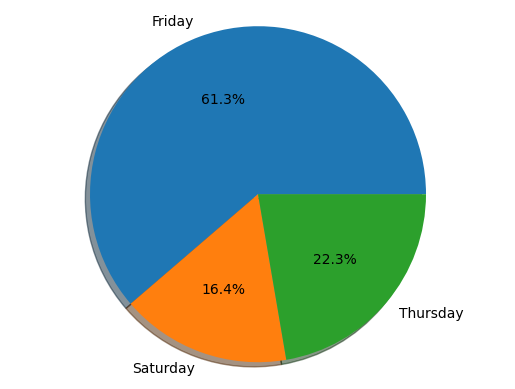

In [59]:
labels = dataset['Day of the Week'].astype('category').cat.categories.tolist()
counts = dataset['Day of the Week'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

<Axes: xlabel='Day of the Week'>

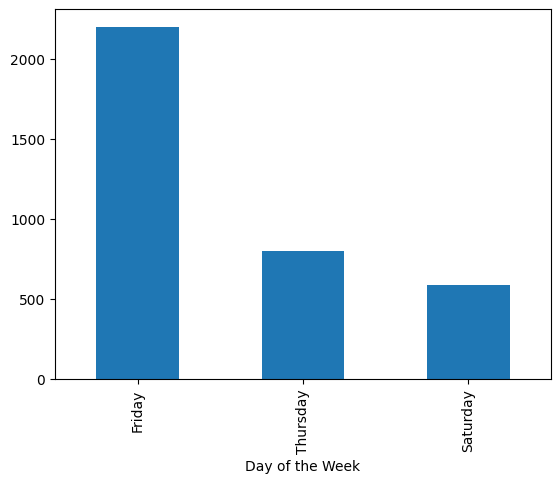

In [60]:
dataset['Day of the Week'].value_counts().plot(kind='bar')

#### Análise da tendência central dos dados

In [61]:
dataset[["S1 Signal Strength", "Distance to S1", "S2 Signal Strength", 
         "Distance to S2", "X", "Y"]].describe()


,S1 Signal Strength,Distance to S1,S2 Signal Strength,Distance to S2,X,Y
count,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000
mean,-81.072011,11.801415,-87.354087,22.440151,-0.417206,2.455633
std,8.453198,9.110711,7.689337,14.100295,5.281696,7.285364
min,-97.000000,0.047078,-100.000000,0.637492,-26.084861,-1.000000
25%,-88.000000,3.981072,-93.383333,8.971641,-1.000000,-1.000000
50%,-82.500000,9.456255,-90.000000,22.387211,-1.000000,-1.000000
75%,-75.000000,17.782794,-82.000000,33.552058,-1.000000,-1.000000
max,-36.000000,50.118723,-59.000000,70.794578,37.561762,41.227081


#### Análise da dispersão estatística dos dados

<Axes: xlabel='Y', ylabel='Count'>

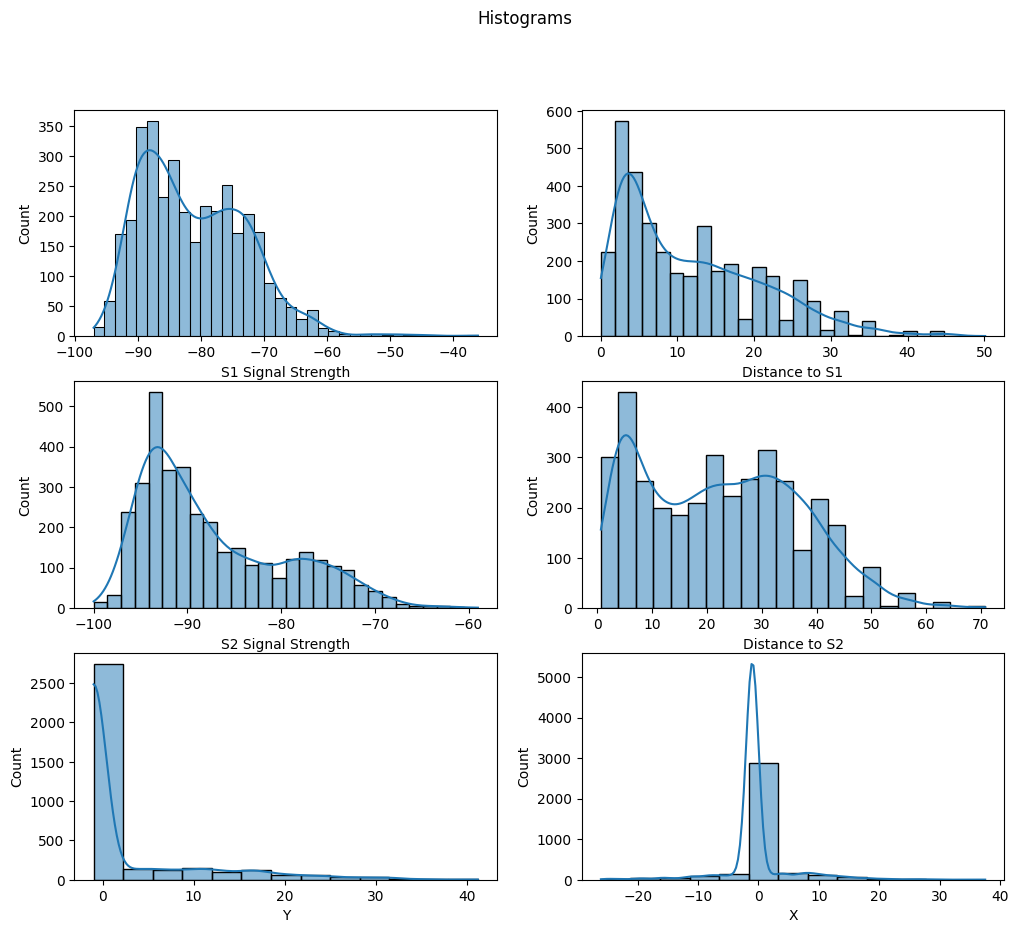

In [62]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Histograms')

sns.histplot(dataset['S1 Signal Strength'], ax=axs[0, 0], kde=True)
sns.histplot(dataset['Distance to S1'], ax=axs[0, 1], kde=True)
sns.histplot(dataset['S2 Signal Strength'], ax=axs[1, 0], kde=True)
sns.histplot(dataset['Distance to S2'], ax=axs[1, 1], kde=True)
sns.histplot(dataset['X'], ax=axs[2, 1], kde=True)
sns.histplot(dataset['Y'], ax=axs[2, 0], kde=True)

#### Análise multivariada

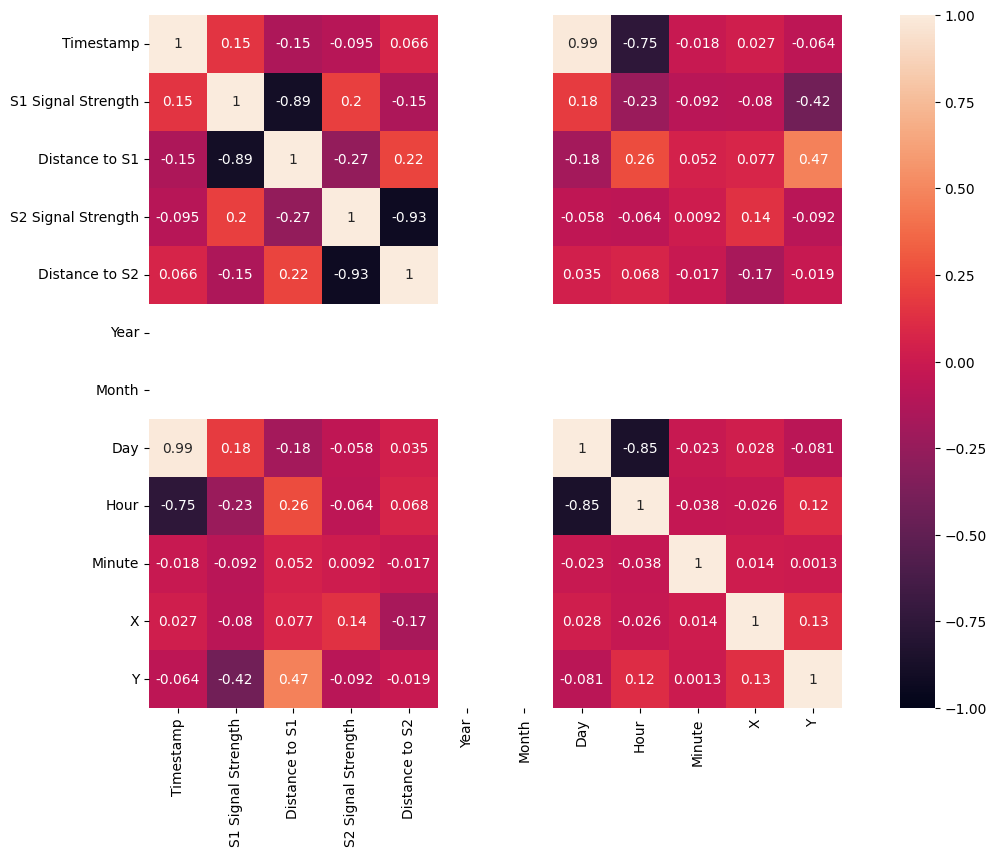

In [63]:
corr_matrix = dataset.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15, 9))

sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

### Relações

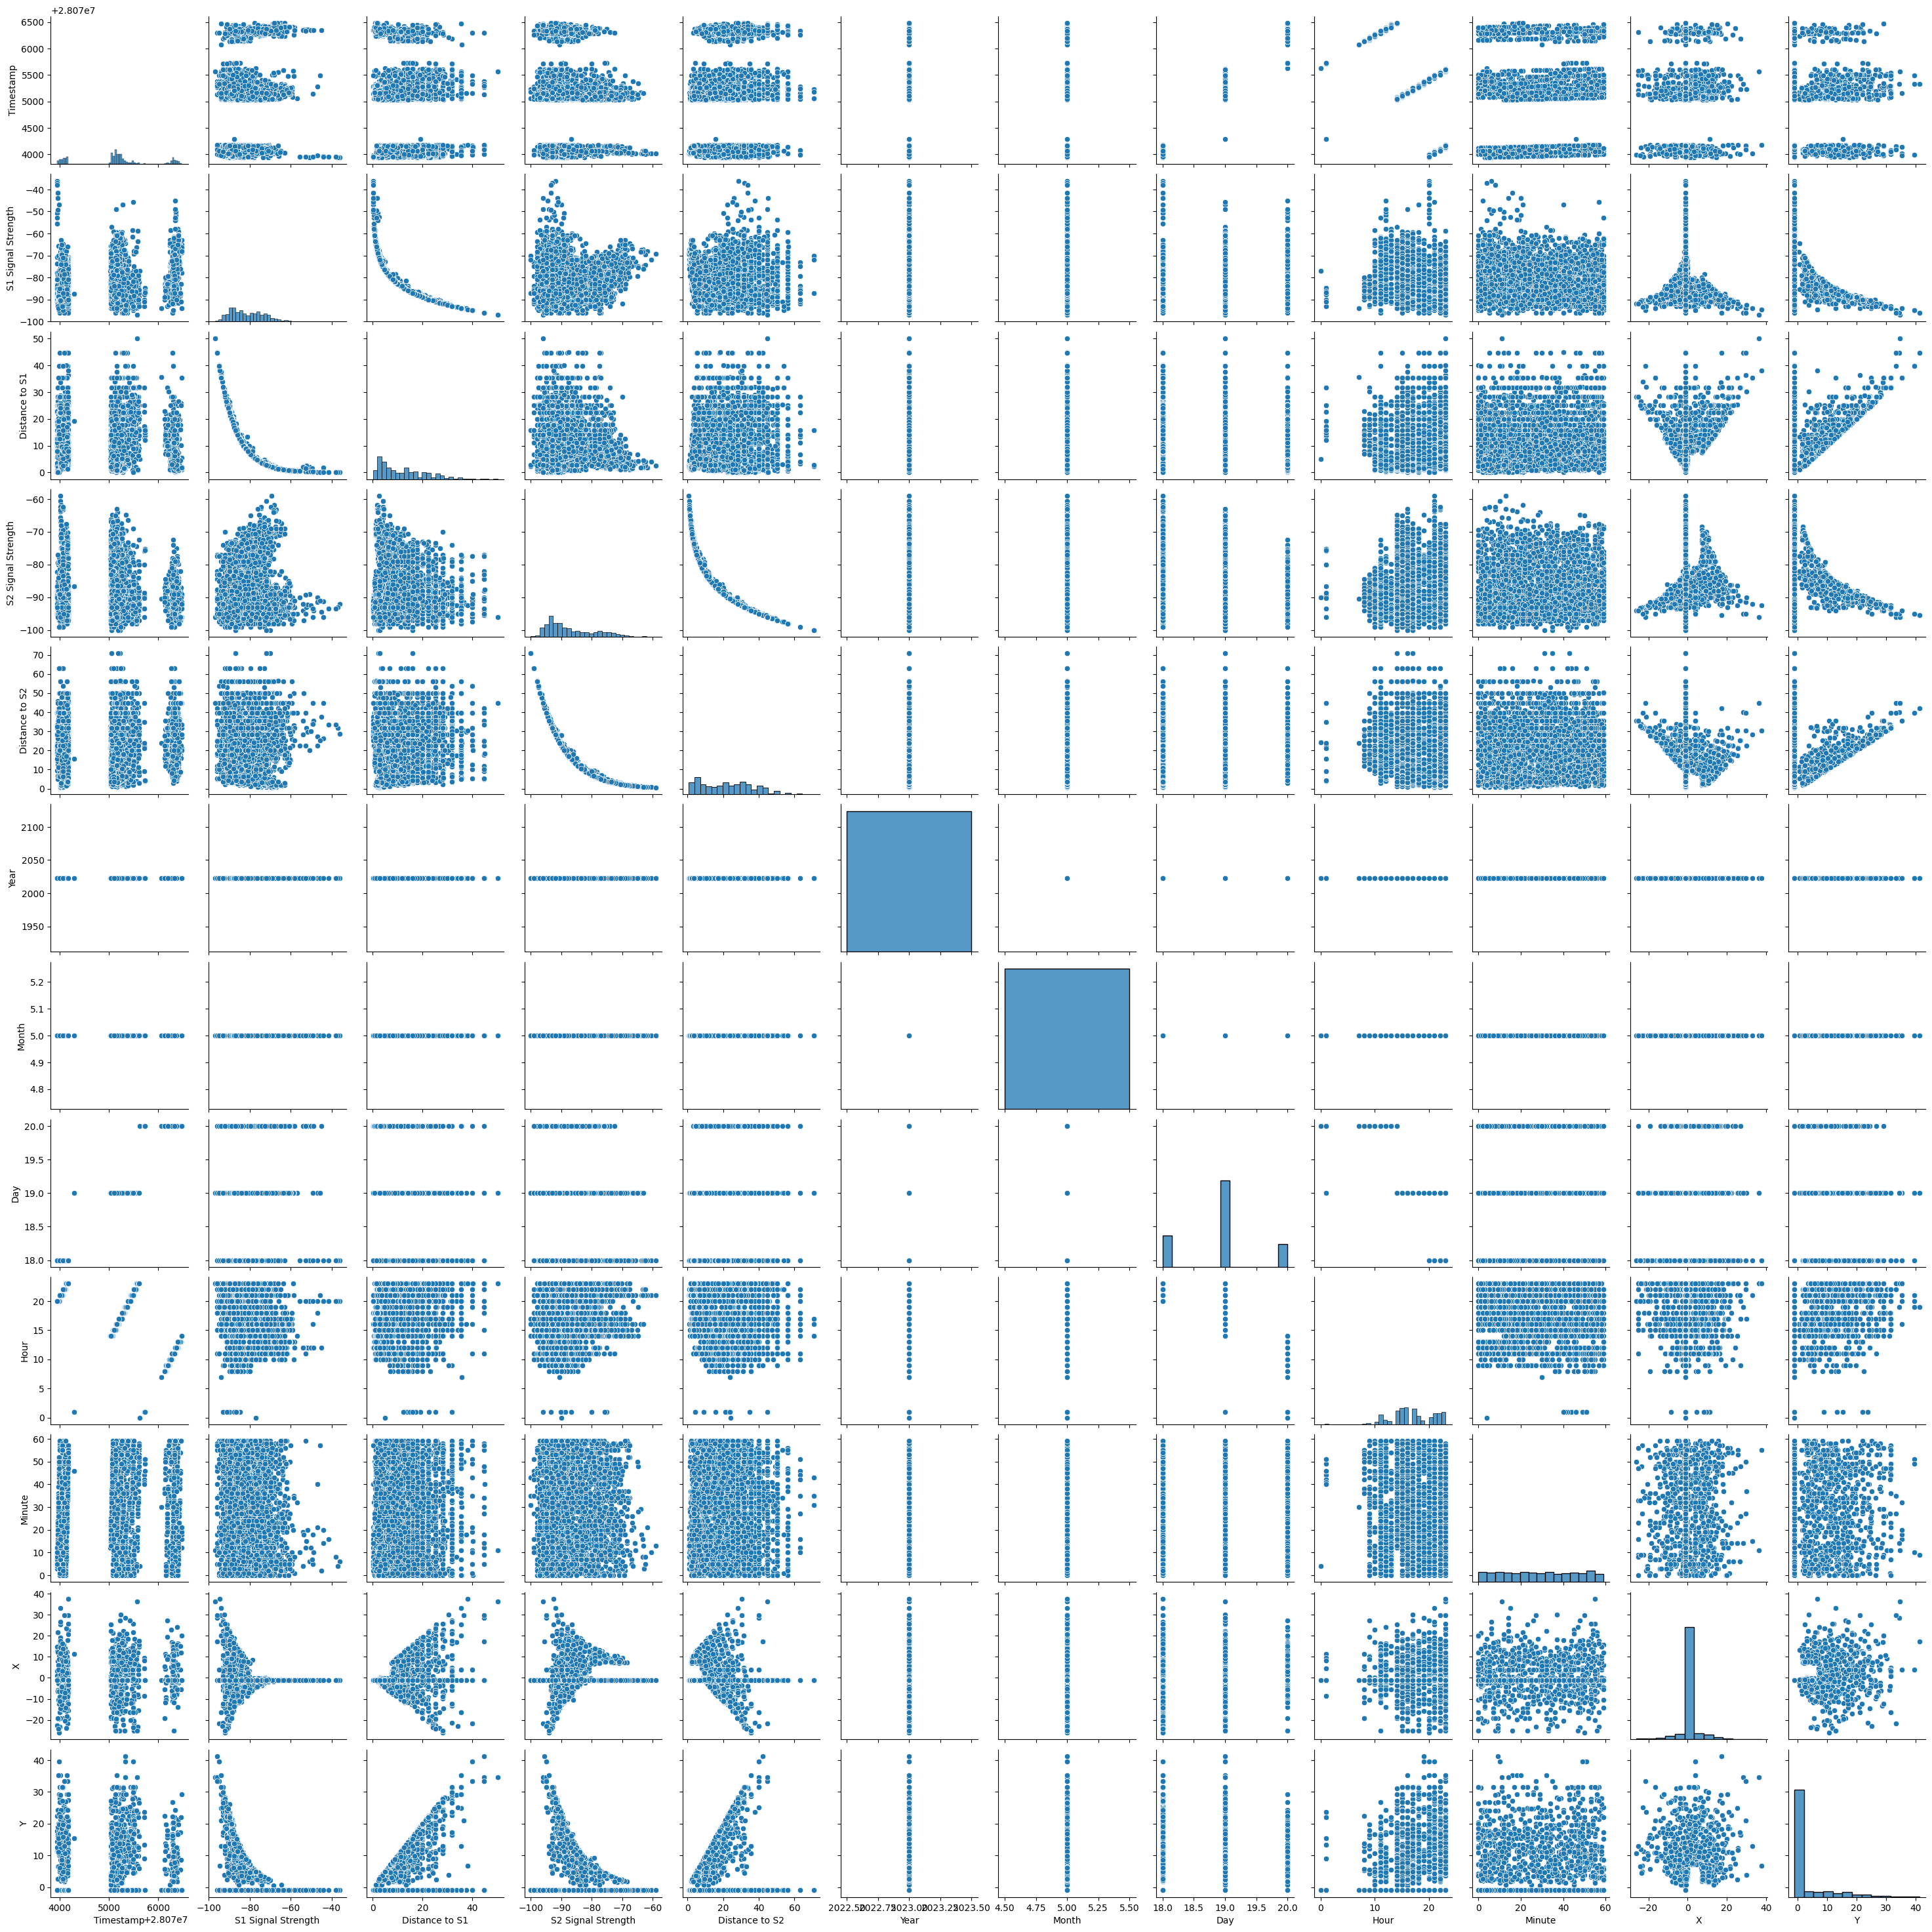

In [64]:
sns.pairplot(dataset)

In [65]:
dataset.to_csv("docs/data.csv", index=False)

## Tratamento e Preparação dos dados


### Eliminação de features

In [41]:
dataset = dataset.drop(columns=["Year", "Month", "Day", "MAC Address", "X", "Y", "Timestamp"])
dataset

,MAC Address,Timestamp,S1 Signal Strength,Distance to S1,S2 Signal Strength,Distance to S2,Year,Month,Day,Day of the Week,Hour,Minute,X,Y,Device,Area
0,00:0c:e7:03:ec:34,28074022,-73.5,3.377467,-75.000000,4.047280,2023,5,18,Thursday,21,22,-1.000000,-1.000000,PC,Zona Estudo
1,00:0c:e7:86:b4:1a,28074025,-83.5,12.091374,-75.000000,4.036047,2023,5,18,Thursday,21,25,-1.000000,-1.000000,PC,Zona Estudo
2,02:0e:6d:57:e7:31,28074038,-79.5,6.962191,-81.500000,8.539729,2023,5,18,Thursday,21,38,-1.000000,-1.000000,PC,Zona Estudo
3,02:35:39:89:4f:08,28074047,-85.0,12.924466,-90.000000,22.387211,2023,5,18,Thursday,21,47,-1.000000,-1.000000,PC,Zona Estudo
4,02:3e:4c:80:a9:ee,28074043,-81.5,8.764879,-83.000000,10.066347,2023,5,18,Thursday,21,43,2.468235,8.410168,PC,Zona Estudo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,fe:9e:ca:da:a2:c9,28073950,-81.0,7.943282,-93.000000,32.464791,2023,5,18,Thursday,20,10,-1.000000,-1.000000,Phone,Zona Estudo
1231,fe:a2:13:13:f2:89,28074003,-85.0,12.589254,-89.000000,19.952623,2023,5,18,Thursday,21,3,-10.976116,6.165566,Phone,Zona Estudo
1232,fe:b3:fd:30:e8:fe,28074092,-78.6,8.001333,-86.142857,17.979351,2023,5,18,Thursday,22,32,-1.000000,-1.000000,Phone,Zona Estudo
1233,fe:b3:fd:30:e8:fe,28074135,-82.0,8.912509,-87.500000,17.152048,2023,5,18,Thursday,23,15,-1.000000,-1.000000,Phone,Zona Estudo


#### Normalização dos dados

In [15]:
columns = {"S1 Signal Strength", "Distance to S1", "S2 Signal Strength",
          "Distance to S2", "X", "Y"}

for column in columns:
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())         
        
dataset

,Timestamp,S1 Signal Strength,Distance to S1,S2 Signal Strength,Distance to S2,Day of the Week,Hour,Minute,X,Y,Device,Area
0,28050575,0.168142,0.340190,0.232143,0.230769,Tuesday,14,35,0.429000,0.202974,PC,Ciencias da Saude
1,28050575,0.168142,0.338044,0.125000,0.454539,Tuesday,14,35,0.000000,0.000000,PC,Ciencias Empresariais e Economicas
2,28050556,0.632743,0.025649,0.678571,0.012947,Tuesday,14,16,0.000000,0.000000,PC,Ciencias Empresariais e Economicas
3,28050563,0.681416,0.011336,0.609127,0.020088,Tuesday,14,23,0.000000,0.000000,PC,Artes e Letras
4,28050571,0.500492,0.044297,0.668367,0.013128,Tuesday,14,31,0.000000,0.000000,PC,Tecnologia e Engenharia
...,...,...,...,...,...,...,...,...,...,...,...,...
2120,28050592,0.132743,0.423628,0.071429,0.637412,Tuesday,14,52,0.000000,0.000000,Phone,Ciencias Sociais e Humanas
2121,28050641,0.048673,0.793216,0.330357,0.139927,Tuesday,15,41,0.000000,0.000000,Phone,Ciencias Sociais e Humanas
2122,28050642,0.139823,0.410822,0.214286,0.258422,Tuesday,15,42,0.000000,0.000000,Phone,Tecnologia e Engenharia
2123,28050643,0.103982,0.592573,0.196429,0.289362,Tuesday,15,43,0.000000,0.000000,Phone,Tecnologia e Engenharia


### Discretização de valores nominais

#### Label Encoding

In [16]:
scale_mapper1 = {"Friday":5} #, "Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Saturday":6, "Sunday":7}
scale_mapper2 = {"Phone":1} #, "PC":2
scale_mapper3 = {'Tecnologia e Engenharia' : 1, 'Ciencias da Saude' : 2, 'Artes e Letras' : 3, 'Ciencias Naturais e Matematica' : 4, 
                 'Ciencias Sociais e Humanas' : 5, 'Ciencias Empresariais e Economicas' : 6, 'Sessao de Estudo' : 7, 
                 'Sessao de Leitura' : 8}
dataset["Day of the Week"] = dataset["Day of the Week"].replace(scale_mapper1)
dataset["Device"] = dataset["Device"].replace(scale_mapper2)
dataset["Area"] = dataset["Area"].replace(scale_mapper3)
dataset

,Timestamp,S1 Signal Strength,Distance to S1,S2 Signal Strength,Distance to S2,Day of the Week,Hour,Minute,X,Y,Device,Area
0,28050575,0.168142,0.340190,0.232143,0.230769,Tuesday,14,35,0.429000,0.202974,PC,2
1,28050575,0.168142,0.338044,0.125000,0.454539,Tuesday,14,35,0.000000,0.000000,PC,6
2,28050556,0.632743,0.025649,0.678571,0.012947,Tuesday,14,16,0.000000,0.000000,PC,6
3,28050563,0.681416,0.011336,0.609127,0.020088,Tuesday,14,23,0.000000,0.000000,PC,3
4,28050571,0.500492,0.044297,0.668367,0.013128,Tuesday,14,31,0.000000,0.000000,PC,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2120,28050592,0.132743,0.423628,0.071429,0.637412,Tuesday,14,52,0.000000,0.000000,1,5
2121,28050641,0.048673,0.793216,0.330357,0.139927,Tuesday,15,41,0.000000,0.000000,1,5
2122,28050642,0.139823,0.410822,0.214286,0.258422,Tuesday,15,42,0.000000,0.000000,1,1
2123,28050643,0.103982,0.592573,0.196429,0.289362,Tuesday,15,43,0.000000,0.000000,1,1


### Correlação entre features

C:\Users\franc\AppData\Local\Temp\ipykernel_11912\2019259031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


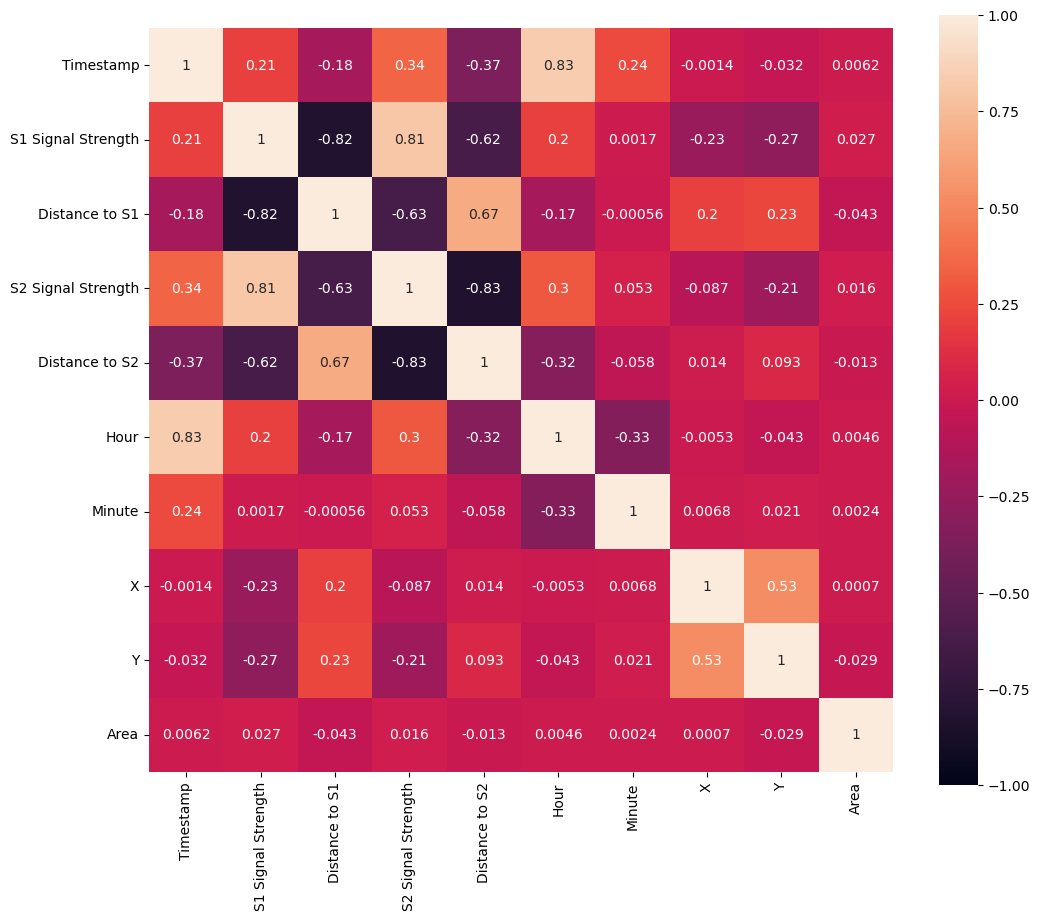

In [17]:
corr_matrix = dataset.corr()
f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True);

# Dataset de previsão de densidade por hora

In [66]:
X = [i for i in range(24)]
Y = [len(dataset[dataset['Hour'] == i]) for i in range(24)]
print(X, Y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23] [1, 15, 0, 0, 0, 0, 0, 1, 13, 38, 60, 248, 119, 82, 350, 415, 442, 399, 225, 107, 178, 284, 292, 313]


## Modelos de Machine Learning

In [18]:
model = dataset
dataset = dataset.drop(columns=['Day of the Week'])

X = dataset[['Timestamp', 'S1 Signal Strength', 'Distance to S1', 'S2 Signal Strength', 'Distance to S2', 
             'Hour', 'Minute', 'X', 'Y', 'Device']]
y = model['Day of the Week']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### MLP

In [94]:
starttime = time.process_time()

model = RandomForestClassifier(n_estimators = 5, max_features = 1, random_state = 42)

print(model)
model.fit(np.asarray(X).reshape((-1, 1)), np.asarray(Y).reshape((-1, 1)))

endtime = time.process_time()
print(f"Tempo decorrido: {endtime - starttime} segundos")

RandomForestClassifier(max_features=1, n_estimators=5, random_state=42)
Tempo decorrido: 0.015625 segundos


C:\Users\jpmag\AppData\Local\Temp\ipykernel_13876\675501882.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(np.asarray(X).reshape((-1, 1)), np.asarray(Y).reshape((-1, 1)))


#### Resultados

In [95]:
Yp = model.predict(np.asarray(X).reshape((-1, 1))).tolist()
print(Yp)

[0, 0, 0, 0, 0, 0, 0, 1, 13, 13, 60, 248, 119, 82, 350, 415, 442, 399, 225, 107, 107, 284, 292, 313]


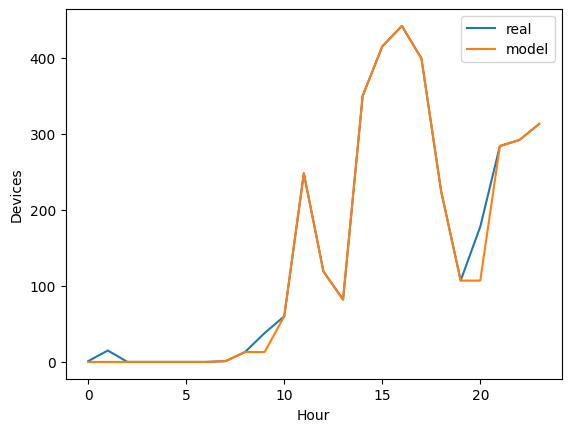

In [98]:
import matplotlib.pyplot as plt

plt.plot(X, Y, label='real')
plt.plot(X, Yp, label='model')

plt.xlabel('Hour')
plt.ylabel('Devices')
plt.legend()

plt.show()

In [97]:
import pickle

filename = 'random_forest_model.sav'
pickle.dump(model, open(filename, 'wb'))

#### Matriz de confusão

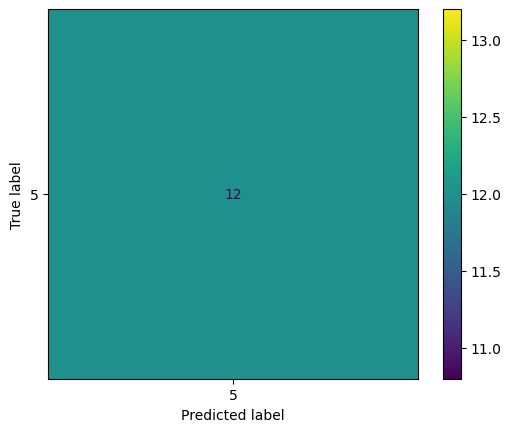

In [26]:
cm = confusion_matrix(y_test, predictionsForest, labels=modelForest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelForest.classes_)

disp.plot()